# gni 논문지 단어 분포 시각화 & 분석

## 목차
0. SetUp 및 파일이름 저장방식 확인
1. 논문의 길이(filelen)
2. Vol별 단어분포(vol conditionalFreqdist)
3. 연도별 단어분포(year conditionalFreqdist)

## 0. SetUp

In [2]:
import os
import nltk
from nltk.corpus import *
corpus_root = "C:/Users/KimMinyoung/nltk_data/corpora/Genomics-Informatics-Corpus-master/Genomics-Informatics-Corpus-master/GNI Corpus 1.0/raw/"
giCorpus = {}
filelists = PlaintextCorpusReader(corpus_root, '.*\.txt', encoding='utf-8')

In [3]:
len(filelists.fileids())

345

In [4]:
wnl = nltk.WordNetLemmatizer()

In [5]:
for i in range(345):
    print(i,filelists.fileids()[i]) 

0 gi-2017-15-3-81.txt
1 gi-2017-15-3-82.txt
2 gi-2017-15-4-113.txt
3 gi-2017-15-4-114.txt
4 gi-2017-15-4-123.txt
5 gi-2017-15-4-128.txt
6 gi-2017-15-4-136.txt
7 gi-2017-15-4-142.txt
8 gi-2017-15-4-147.txt
9 gi-2017-15-4-156.txt
10 gi-2017-15-4-162.txt
11 gi-2017-15-4-170.txt
12 gi-2017-15-4-178.txt
13 gi-2018-16-1-1.txt
14 gi-2018-16-1-10.txt
15 gi-2018-16-1-14.txt
16 gi-2018-16-1-2.txt
17 gni-10-1.txt
18 gni-10-106.txt
19 gni-10-110.txt
20 gni-10-117.txt
21 gni-10-123.txt
22 gni-10-128.txt
23 gni-10-133.txt
24 gni-10-145.txt
25 gni-10-153.txt
26 gni-10-16.txt
27 gni-10-167.txt
28 gni-10-175.txt
29 gni-10-184.txt
30 gni-10-194.txt
31 gni-10-200.txt
32 gni-10-206.txt
33 gni-10-213.txt
34 gni-10-214.txt
35 gni-10-220.txt
36 gni-10-226.txt
37 gni-10-23.txt
38 gni-10-234.txt
39 gni-10-239.txt
40 gni-10-244.txt
41 gni-10-249.txt
42 gni-10-256.txt
43 gni-10-263.txt
44 gni-10-266.txt
45 gni-10-271.txt
46 gni-10-33.txt
47 gni-10-40.txt
48 gni-10-44.txt
49 gni-10-51.txt
50 gni-10-58.txt
51 gni-

총 345개의 논문지가 있었고 파일 이름 저장 방식은 다음과 같았다.

#### index 0~12 : vol.15
'gi-2017-15-x-xxx.txt' 

#### index 14~17 : vol.16
'gi-2018-16-1-x.txt' 

#### index 18~206 : vol. 10-14 
'gni-10~14-xxx.txt' 

#### index 207~ 344:  vol. 6-9
'gni-6~9-x-xx.txt'

#### 또한, 파일을 열어 연도를 확인한 결과 다음과 같았다. 

vol.6,7,8,9 : 2008년

vol.10,11 : 2012년

vol.12 : 2014년

vol.13 : 2015년

vol.14 : 2016년

vol.15 : 2017년

vol.16 : 2018년

따라서 이들을 한눈에 보기 쉽게하기위해, 접근을 편리하게 하기위해 dataframe으로 만들어보자.

아래와 같이 vol, year 리스트에 각각의 값들을 저장해주면된다.

In [6]:
import pandas as pd
import numpy as np
import matplotlib
#df_filelists
vol=[]
year = []
for i in range(0,12):
    vol.append(15)
    year.append(2017)
for i in range(12,17):
    vol.append(16)
    year.append(2018)
for i in range(17,58):
    vol.append(10)
    year.append(2012)
for i in range(58,107):
    vol.append(11)
    year.append(2012)
for i in range(107,151):
    vol.append(12)
    year.append(2014)
for i in range(151,179):
    vol.append(13)
    year.append(2015)
for i in range(179,207):
    vol.append(14)
    year.append(2016)
for i in range(207,246):
    vol.append(6)
    year.append(2008)
for i in range(246,280):
    vol.append(7)
    year.append(2008)
for i in range(280,313):
    vol.append(8)
    year.append(2008)
for i in range(313,345):
    vol.append(9)
    year.append(2008)

In [7]:
df_filelists = pd.DataFrame({'file_name': filelists.fileids(),'vol' : vol, 'year':year})
df_filelists

,file_name,vol,year
0,gi-2017-15-3-81.txt,15,2017
1,gi-2017-15-3-82.txt,15,2017
2,gi-2017-15-4-113.txt,15,2017
3,gi-2017-15-4-114.txt,15,2017
4,gi-2017-15-4-123.txt,15,2017
...,...,...,...
340,gni-9-4-173.txt,9,2008
341,gni-9-4-181.txt,9,2008
342,gni-9-4-189.txt,9,2008
343,gni-9-4-194.txt,9,2008


dataframe으로 만들어 file_name, vol, year에 접근하기 쉽게 잘 만들어졌다.

## 1. 논문의 길이

In [8]:
file_len= []
for file in filelists.fileids():
    wordlist = filelists.words(file)
    file_len.append(len(wordlist))
    print("Printing size of  " + file + " original wordlist: " + str(len(wordlist)))
    lemmatizedWordlist = [wnl.lemmatize(t) for t in wordlist]
    giCorpus[file] = lemmatizedWordlist
    fd = nltk.FreqDist(w for w in lemmatizedWordlist)

Printing size of  gi-2017-15-3-81.txt original wordlist: 367
Printing size of  gi-2017-15-3-82.txt original wordlist: 1949
Printing size of  gi-2017-15-4-113.txt original wordlist: 395
Printing size of  gi-2017-15-4-114.txt original wordlist: 3638
Printing size of  gi-2017-15-4-123.txt original wordlist: 2054
Printing size of  gi-2017-15-4-128.txt original wordlist: 2618
Printing size of  gi-2017-15-4-136.txt original wordlist: 2644
Printing size of  gi-2017-15-4-142.txt original wordlist: 1804
Printing size of  gi-2017-15-4-147.txt original wordlist: 3374
Printing size of  gi-2017-15-4-156.txt original wordlist: 1972
Printing size of  gi-2017-15-4-162.txt original wordlist: 3338
Printing size of  gi-2017-15-4-170.txt original wordlist: 3129
Printing size of  gi-2017-15-4-178.txt original wordlist: 2084
Printing size of  gi-2018-16-1-1.txt original wordlist: 415
Printing size of  gi-2018-16-1-10.txt original wordlist: 2454
Printing size of  gi-2018-16-1-14.txt original wordlist: 2858
P

Printing size of  gni-12-64.txt original wordlist: 3124
Printing size of  gni-12-71.txt original wordlist: 2613
Printing size of  gni-12-76.txt original wordlist: 1061
Printing size of  gni-12-79.txt original wordlist: 569
Printing size of  gni-12-80.txt original wordlist: 3751
Printing size of  gni-12-87.txt original wordlist: 6882
Printing size of  gni-12-98.txt original wordlist: 2988
Printing size of  gni-13-1.txt original wordlist: 301
Printing size of  gni-13-102.txt original wordlist: 5463
Printing size of  gni-13-112.txt original wordlist: 3384
Printing size of  gni-13-119.txt original wordlist: 3430
Printing size of  gni-13-126.txt original wordlist: 2729
Printing size of  gni-13-132.txt original wordlist: 2031
Printing size of  gni-13-137.txt original wordlist: 3591
Printing size of  gni-13-146.txt original wordlist: 3059
Printing size of  gni-13-15.txt original wordlist: 4596
Printing size of  gni-13-152.txt original wordlist: 1592
Printing size of  gni-13-156.txt original w

Printing size of  gni-8-1-9.txt original wordlist: 22390
Printing size of  gni-8-2-63.txt original wordlist: 24163
Printing size of  gni-8-2-70.txt original wordlist: 24436
Printing size of  gni-8-2-76.txt original wordlist: 24636
Printing size of  gni-8-2-81.txt original wordlist: 24818
Printing size of  gni-8-2-86.txt original wordlist: 25040
Printing size of  gni-8-2-90.txt original wordlist: 25250
Printing size of  gni-8-2-94.txt original wordlist: 25293
Printing size of  gni-8-3-101.txt original wordlist: 25545
Printing size of  gni-8-3-103.txt original wordlist: 25804
Printing size of  gni-8-3-108.txt original wordlist: 25916
Printing size of  gni-8-3-116.txt original wordlist: 25978
Printing size of  gni-8-3-122.txt original wordlist: 26042
Printing size of  gni-8-3-131.txt original wordlist: 26119
Printing size of  gni-8-3-138.txt original wordlist: 26205
Printing size of  gni-8-3-142.txt original wordlist: 26353
Printing size of  gni-8-3-150.txt original wordlist: 26481
Printi

위와 같이 345개의 논문 길이가 계산된다. 다만 쉽게 파악하기 힘드므로, 시각화하여 살펴보려고 한다.

각 논문의 길이 또한 DataFrame에 넣어주면 다음과 같다.

In [9]:
df_filelists = pd.DataFrame({'file_name': filelists.fileids(),'vol' : vol, 'year':year,'file_len':file_len})
df_filelists.head()

,file_name,vol,year,file_len
0,gi-2017-15-3-81.txt,15,2017,367
1,gi-2017-15-3-82.txt,15,2017,1949
2,gi-2017-15-4-113.txt,15,2017,395
3,gi-2017-15-4-114.txt,15,2017,3638
4,gi-2017-15-4-123.txt,15,2017,2054


#### 논문(vol)별 file_len의 합

In [10]:
filelen_sum = df_filelists.groupby('vol').sum()
filelen_sum.drop(columns='year')

,file_len
vol,
6,426993
7,634884
8,834052
9,916382
10,107580
11,137952
12,136481
13,70122
14,87834


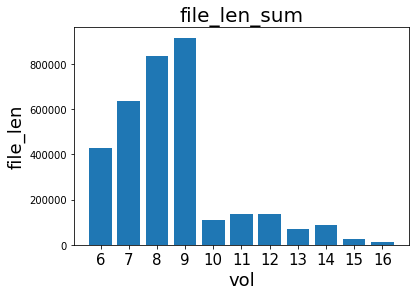

In [11]:
import matplotlib.pyplot as plt
vol = np.arange(6,17)
file_len_sum =  filelen_sum['file_len']
plt.bar(vol, file_len_sum)
plt.title('file_len_sum', fontsize=20)
plt.xlabel('vol', fontsize=18)
plt.ylabel('file_len', fontsize=18)
plt.xticks(vol, fontsize=15)
plt.show()

#### 논문별 original worlist size 자세한 통계치

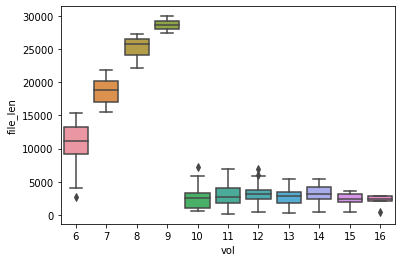

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='vol', y='file_len', data=df_filelists)

vol.6-9 논문은 대체적으로 길이가 길고, 10-16 논문은 길이가 짧다는 것을 확인할 수 있다.

## 2. Vol별 단어 빈도수

###  각 단어별 출현 빈도

In [13]:
[(fileid[:-4], target)
 for fileid in filelists.fileids()
 for word in filelists.words(fileid)
 for target in ['cancer', 'expression']
 if word.lower().startswith(target)]

[('gi-2017-15-3-81', 'expression'),
 ('gi-2017-15-4-113', 'expression'),
 ('gi-2017-15-4-114', 'cancer'),
 ('gi-2017-15-4-114', 'cancer'),
 ('gi-2017-15-4-114', 'expression'),
 ('gi-2017-15-4-114', 'cancer'),
 ('gi-2017-15-4-114', 'expression'),
 ('gi-2017-15-4-114', 'expression'),
 ('gi-2017-15-4-114', 'cancer'),
 ('gi-2017-15-4-114', 'cancer'),
 ('gi-2017-15-4-114', 'cancer'),
 ('gi-2017-15-4-114', 'expression'),
 ('gi-2017-15-4-114', 'expression'),
 ('gi-2017-15-4-114', 'expression'),
 ('gi-2017-15-4-114', 'expression'),
 ('gi-2017-15-4-114', 'cancer'),
 ('gi-2017-15-4-114', 'expression'),
 ('gi-2017-15-4-114', 'cancer'),
 ('gi-2017-15-4-114', 'cancer'),
 ('gi-2017-15-4-114', 'expression'),
 ('gi-2017-15-4-114', 'expression'),
 ('gi-2017-15-4-114', 'expression'),
 ('gi-2017-15-4-114', 'expression'),
 ('gi-2017-15-4-114', 'cancer'),
 ('gi-2017-15-4-114', 'cancer'),
 ('gi-2017-15-4-114', 'cancer'),
 ('gi-2017-15-4-114', 'expression'),
 ('gi-2017-15-4-114', 'expression'),
 ('gi-2017-15

-> 전체를 시각화하면 너무 많으므로 conditional FreqDist를 dataframe으로 만들어서 vol별로, 연도별로 통계치를 출력하려고 한다.

검색할 단어 리스트 : target_list에 넣어주면 된다.

In [14]:
target_list =['algorithm','alignments','cancer', 'expression','genome']

cfd = nltk.ConditionalFreqDist(
    (fileid, target)
 for fileid in filelists.fileids()
 for word in filelists.words(fileid)
 for target in target_list
 if word.lower().startswith(target)
)

In [15]:
df_freq=pd.DataFrame.from_dict(cfd,orient='index')
df_freq.index.name='file_name'
df_freq
df_filelists=pd.merge(df_filelists,df_freq,how='left',on='file_name')

In [16]:
freq_sum = df_filelists.groupby('vol').sum()
freq_sum.drop(columns='year')

,file_len,expression,genome,cancer,algorithm,alignments
vol,,,,,,
6,426993,377.0,2033.0,480.0,95.0,0.0
7,634884,667.0,2472.0,628.0,117.0,0.0
8,834052,1079.0,2797.0,715.0,132.0,0.0
9,916382,1156.0,2953.0,972.0,190.0,0.0
10,107580,157.0,337.0,309.0,105.0,1.0
11,137952,188.0,402.0,373.0,56.0,9.0
12,136481,219.0,462.0,286.0,35.0,2.0
13,70122,202.0,206.0,220.0,16.0,3.0
14,87834,108.0,153.0,87.0,32.0,4.0


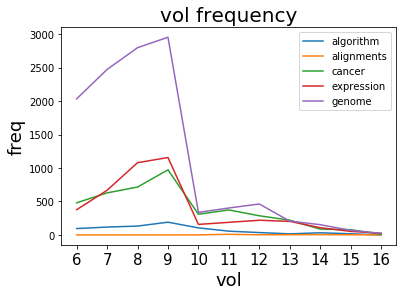

In [17]:
algorithm = freq_sum['algorithm']
alignments = freq_sum['alignments']
cancer = freq_sum['cancer']
expression = freq_sum['expression']
genome = freq_sum['genome']


vol = np.arange(6,17)
file_len_sum =  filelen_sum['file_len']
plt.plot(vol, algorithm,label='algorithm')
plt.plot(vol, alignments,label='alignments')
plt.plot(vol, cancer,label='cancer')
plt.plot(vol, expression,label='expression')
plt.plot(vol, genome,label='genome')

plt.title('vol frequency', fontsize=20)
plt.xlabel('vol', fontsize=18)
plt.ylabel('freq', fontsize=18)
plt.xticks(vol, fontsize=15)
plt.legend()
plt.show()

전체적으로 봤을 때, genome 단어가 확실히 많이 등장하는 것을 볼 수 있다. 또한 cancer, expression 단어도 꽤 많이 등장한다. 반면에 alignments와 algorithm 단어는 상대적으로 적게 등장한다.

다만, 앞에서 살펴봤듯이 vol.6-9의 논문의 길이 자체가 길고, vol 11-16 논문의 길이는 짧았기 때문에 vol.6-9의 target 단어의 개수 또한 수적으로 클 수 밖에 없었다. (file_len 그래프와 분포양상이 비슷하다.) 따라서 vol별로 정확한 비교해보기위해, 각 논문의 길이를 고려하여 "특정단어빈도수/논문의길이"그래프를 그려보자

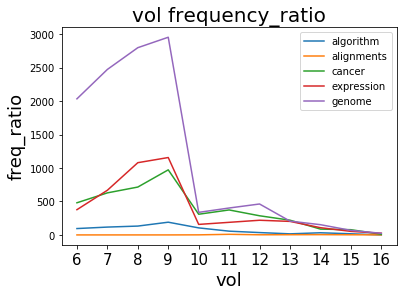

In [18]:
vol = np.arange(6,17)
file_len_sum =  filelen_sum['file_len']
plt.plot(vol, algorithm,label='algorithm')
plt.plot(vol, alignments,label='alignments')
plt.plot(vol, cancer,label='cancer')
plt.plot(vol, expression,label='expression')
plt.plot(vol, genome,label='genome')
plt.title('vol frequency_ratio', fontsize=20)
plt.xlabel('vol', fontsize=18)
plt.ylabel('freq_ratio', fontsize=18)
plt.xticks(vol, fontsize=15)
plt.legend()
plt.show()

cancer : vol.6-9,14에서는 다른 논문에 비해 등장하는 비율이 적고, vol.10 13 15에서는 다른 논문들에 비해 cancer 단어가 많이 등장하는 것을 확인할 수 있다.

algorithm : 다른 논문에 비해 vol.10, vol15 에서 등장하는 비율이 높은 것을 확인할 수 있다.

alignments : 모든 논문에서 굉장히 적게 등장했고, vol 6~9 에서는 아예 등장하지 않았다.

genome : 모든 논문에서 많이 등장했지만, 특히 vol6에서 두드러지는 것이 보인다.

expression :모든 논문에서 꽤 많이 등장하는데 vol.13에서 다른 논문에 비해 등장하는 비율이 높다.

## 3. 연도별 단어빈도수

In [19]:
freq_sum_year = df_filelists.groupby('year').sum()
freq_sum_year.drop(columns='vol')

,file_len,expression,genome,cancer,algorithm,alignments
year,,,,,,
2008,2812311,3279.0,10255.0,2795.0,534.0,0.0
2012,245532,345.0,739.0,682.0,161.0,10.0
2014,136481,219.0,462.0,286.0,35.0,2.0
2015,70122,202.0,206.0,220.0,16.0,3.0
2016,87834,108.0,153.0,87.0,32.0,4.0
2017,27282,53.0,68.0,78.0,17.0,2.0
2018,10716,25.0,24.0,10.0,0.0,1.0


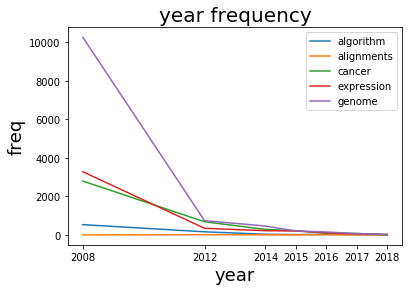

In [20]:
algorithm = freq_sum_year['algorithm']
alignments = freq_sum_year['alignments']
cancer = freq_sum_year['cancer']
expression = freq_sum_year['expression']
genome = freq_sum_year['genome']

year =[2008,2012,2014,2015,2016,2017,2018]
file_len_sum =  filelen_sum['file_len']
plt.plot(year, algorithm,label='algorithm')
plt.plot(year, alignments,label='alignments')
plt.plot(year, cancer,label='cancer')
plt.plot(year, expression,label='expression')
plt.plot(year, genome,label='genome')
plt.title('year frequency', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('freq', fontsize=18)
plt.xticks(year, fontsize=10)
plt.legend()
plt.show()

genome 단어가 확실히 많이 등장하는 것을 볼 수 있다. cancer, expression 단어도 꽤 많이 등장한다. algorithm, alignments는 적게 등장하는 것을 볼 수 있다.

연도별로 살펴볼 때에도 각 논문의 길이를 고려하여 "특정단어빈도수/논문의길이"그래프를 그려볼 수 있다.

In [21]:
year = [2008,2012,2014,2015,2016,2017,2018]
algorithm = freq_sum_year['algorithm']/freq_sum_year['file_len']
alignments = freq_sum_year['alignments']/freq_sum_year['file_len']
cancer = freq_sum_year['cancer']/freq_sum_year['file_len']
expression = freq_sum_year['expression']/freq_sum_year['file_len']
genome = freq_sum_year['genome']/freq_sum_year['file_len']

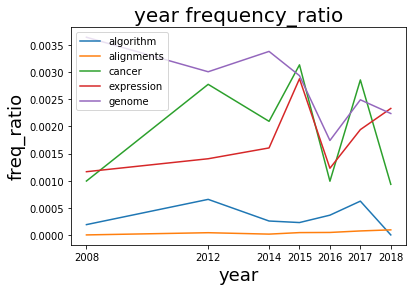

In [22]:
plt.plot(year, algorithm,label='algorithm')
plt.plot(year, alignments,label='alignments')
plt.plot(year, cancer,label='cancer')
plt.plot(year, expression,label='expression')
plt.plot(year, genome,label='genome')
plt.title('year frequency_ratio', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('freq_ratio', fontsize=18)
plt.xticks(year, fontsize=10)
plt.legend()
plt.show()

expression : 다른 연도에 비해 2015년, 2017년에 자주 등장한 것을 볼 수 있다.

cancer : 다른 연도에 비해 2012, 2015, 2017년에 자주 등장한 것을 볼 수 있다.

genome : 전체적으로 자주 등장했지만, 2016년에는 다른 연도에비해 상대적으로 덜 등장한 것을 볼 수 있다.

alignments : 전체적으로 적게 등장했다.

algorithm : 전체적으로 적게 등장했지만, 2012년과 2017년에는 다른 연도에 비해 상대적으로 자주 등장한 것을 볼 수 있다.